# Assignment11
# This script is about image denoising.
# Name : Lee Gyu Hyeong
# Student ID : 20122208
# Link to github : https://github.com/GyuHyeong/assignment11.git

# Import packages for plotting graphs and manipulating data. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import signal
from skimage import io, color
from skimage import exposure

# Bring images and set properly for manipulating.

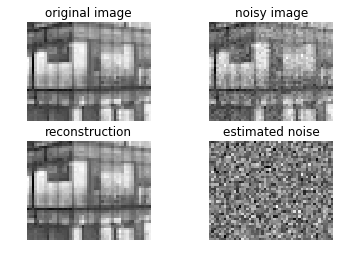

In [2]:
file_image  = 'cau.jpg'

im_color    = io.imread(file_image)
im_gray     = color.rgb2gray(im_color)
im          = (im_gray - np.mean(im_gray)) / np.std(im_gray)
im=im[100:140,100:150]
(row, col)  = im.shape

noise_std   = 0.2 # try with varying noise standard deviation
noise       = np.random.normal(0, noise_std, (row, col))
im_noise    = im + noise

# obtain the reconstructed (denoised) images with varying degrees of regularization 

im_recon    = im # this must be replaced with the reconstructed (denoised) image 
noise_recon = im_noise - im_recon
error       = np.linalg.norm(im - im_recon)

p1 = plt.subplot(2,2,1)
p1.set_title('original image')
plt.imshow(im, cmap='gray')
plt.axis('off')

p2 = plt.subplot(2,2,2)
p2.set_title('noisy image')
plt.imshow(im_noise, cmap='gray')
plt.axis('off')

p3 = plt.subplot(2,2,3)
p3.set_title('reconstruction')
plt.imshow(im_recon, cmap='gray')
plt.axis('off')

p4 = plt.subplot(2,2,4)
p4.set_title('estimated noise')
plt.imshow(noise_recon, cmap='gray')
plt.axis('off')

plt.show()

# Define a function that reconstruct the image. And this function has parameters noise std(noise standard deviation) and lamb(regularization parameter).

In [3]:
def denoising_func(noisestd,lamb):
    noise       = np.random.normal(0, noisestd, (row, col))
    imnoise    = im + noise

    # obtain the reconstructed (denoised) images with varying degrees of regularization 

    #imrecon    = im # this must be replaced with the reconstructed (denoised) image 
    #noise_recon = imnoise - imrecon
    #error       = np.linalg.norm(im - imrecon)
    
    A=np.zeros((3*row *col-row-col, row*col), dtype=float)
    for i in range(row*col):
        A[i,i]=1
    
    A_1=np.zeros((row*col-row,row*col),dtype=float)
    A_2=np.zeros((row*col-col,row*col),dtype=float)
    nn=0
    for i in range(row*col-row):
        A_1[i,i+nn]=1
        A_1[i,i+1+nn]=-1
        if((i+1)%(col-1)==0):
            nn+=1
    for i in range(row*col-col):
        A_2[i,i]=1
        A_2[i,i+col]=-1
    A_1=A_1*math.sqrt(lamb)
    A_2=A_2*math.sqrt(lamb)
    for i in range(row*col-row):
        for j in range(row*col):
            A[i+row*col,j]=A_1[i,j]
    for i in range(row*col-col):
        for j in range(row*col):
            A[i+2*row*col-row,j]=A_2[i,j]
    
    f=np.zeros(3*row*col-row-col, dtype=float)
    f_0=imnoise.reshape(row*col)
    for i in range(row*col):
        f[i]=f_0[i]
    
    imrecon=((np.linalg.pinv((A.T).dot(A))).dot(A.T)).dot(f)
    imrecon=imrecon.reshape((row,col))
    error       = np.linalg.norm(im - imrecon)
    noise_recon = im_noise - imrecon
    
    print('     when lambda: ',lamb)
    p1 = plt.subplot(2,2,1)
    p1.set_title('original image')
    plt.imshow(im, cmap='gray')
    plt.axis('off')

    p2 = plt.subplot(2,2,2)
    p2.set_title('noisy image')
    plt.imshow(im_noise, cmap='gray')
    plt.axis('off')

    p3 = plt.subplot(2,2,3)
    p3.set_title('reconstruction')
    plt.imshow(imrecon, cmap='gray')
    plt.axis('off')

    p4 = plt.subplot(2,2,4)
    p4.set_title('estimated noise')
    plt.imshow(noise_recon, cmap='gray')
    plt.axis('off')

    plt.show()
    print('     error: ',error)
    print('\n')
    
    return 
    
    
    


# Try with varying the noise standard deviation  and the regularization parameter.

when noise std:  0.2
     when lambda:  0.0078125


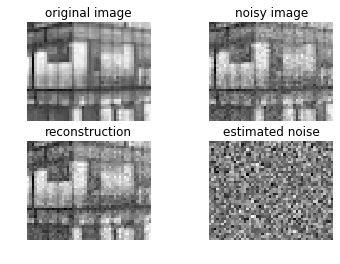

     error:  8.764606091568046


     when lambda:  0.015625


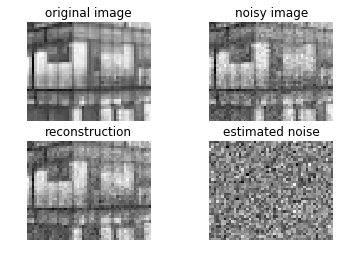

     error:  8.521674705546165


     when lambda:  0.03125


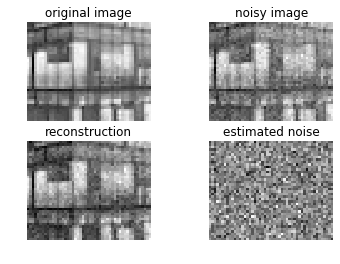

     error:  8.135280130920366


     when lambda:  0.0625


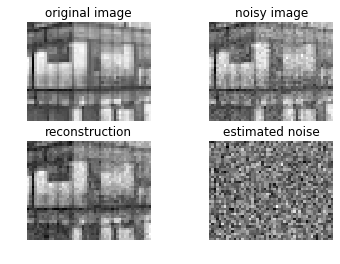

     error:  7.617246322537552


     when lambda:  0.125


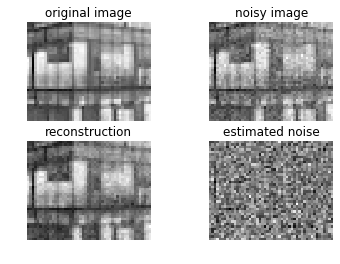

     error:  7.212511946572108


     when lambda:  0.25


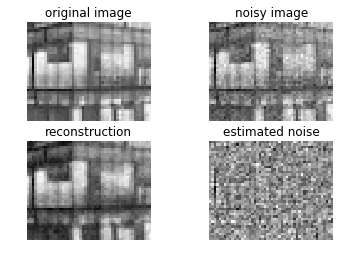

     error:  7.606282067817856


     when lambda:  0.5


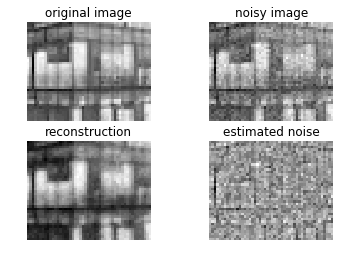

     error:  9.345387541365685


     when lambda:  1


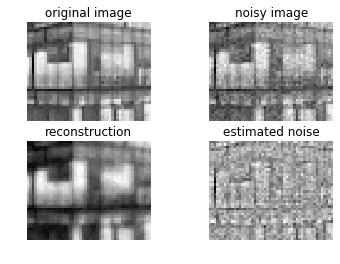

     error:  11.80178346462964


     when lambda:  2


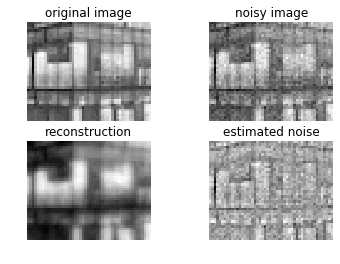

     error:  14.70792320852436


     when lambda:  4


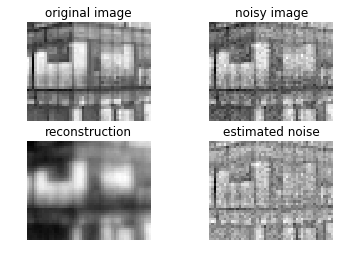

     error:  17.641232380283732


--------------------------------------
when noise std:  0.45
     when lambda:  0.0078125


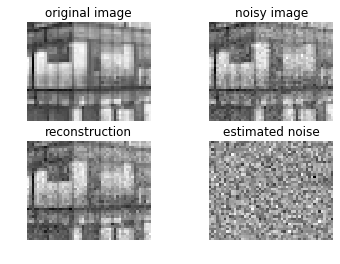

     error:  8.649748393676552


     when lambda:  0.015625


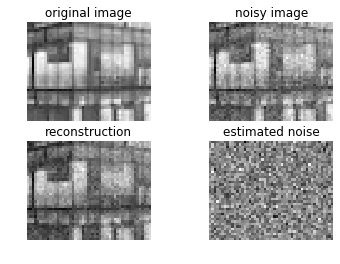

     error:  8.72506252470516


     when lambda:  0.03125


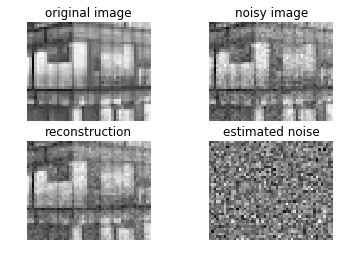

     error:  7.892773949839047


     when lambda:  0.0625


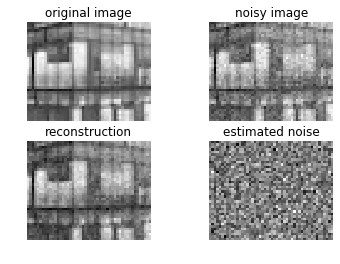

     error:  7.489749043087099


     when lambda:  0.125


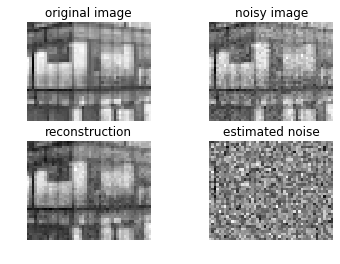

     error:  7.20858012209065


     when lambda:  0.25


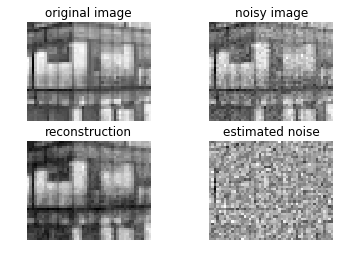

     error:  7.705772064590496


     when lambda:  0.5


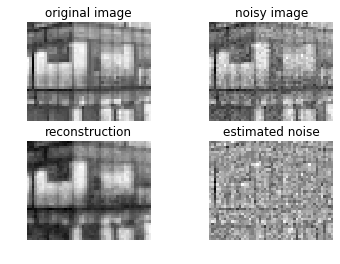

     error:  9.360645081362541


     when lambda:  1


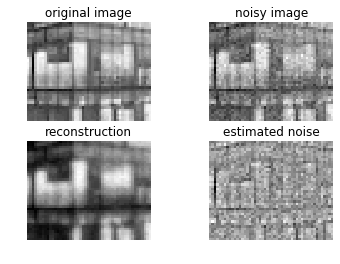

     error:  11.881919428530031


     when lambda:  2


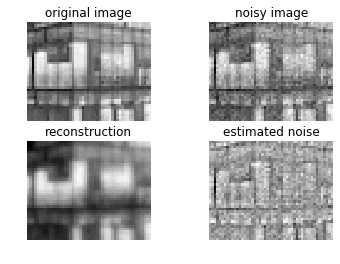

     error:  14.656782068882288


     when lambda:  4


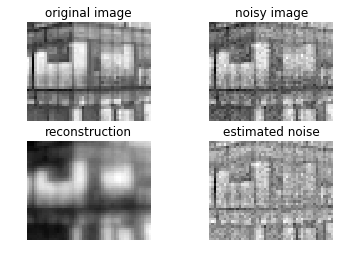

     error:  17.68259321031777


--------------------------------------
when noise std:  0.7
     when lambda:  0.0078125


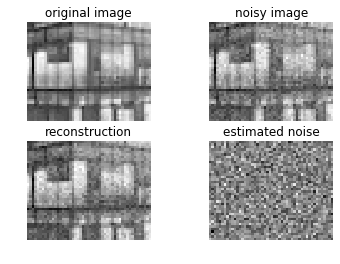

     error:  8.630695613590815


     when lambda:  0.015625


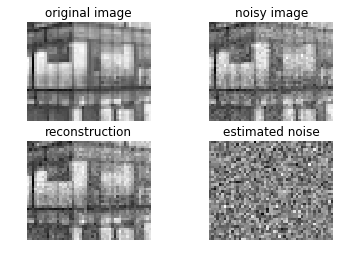

     error:  8.500664545104444


     when lambda:  0.03125


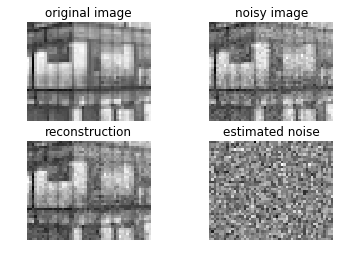

     error:  8.11279981872607


     when lambda:  0.0625


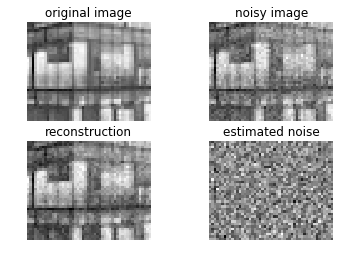

     error:  7.530836697657776


     when lambda:  0.125


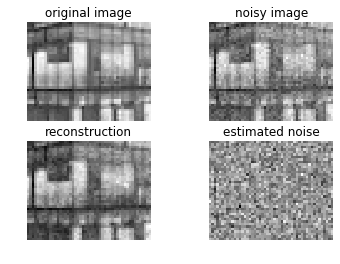

     error:  7.249767697906731


     when lambda:  0.25


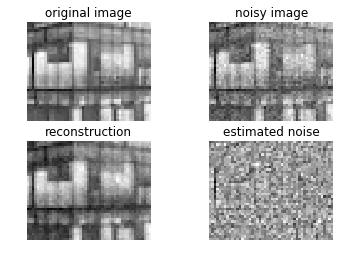

     error:  7.682257757689244


     when lambda:  0.5


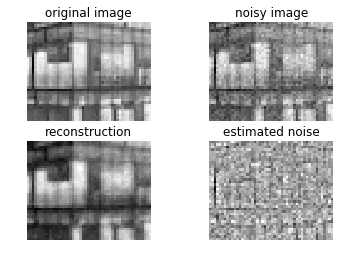

     error:  9.21238801934291


     when lambda:  1


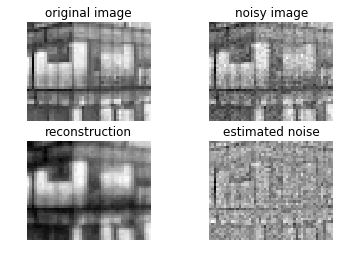

     error:  11.719296358915921


     when lambda:  2


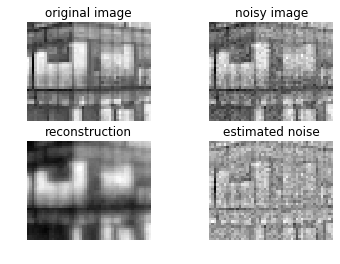

     error:  14.697773822955128


     when lambda:  4


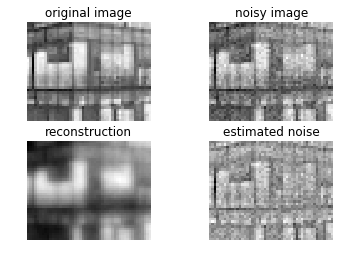

     error:  17.565307709731044


--------------------------------------
when noise std:  1
     when lambda:  0.0078125


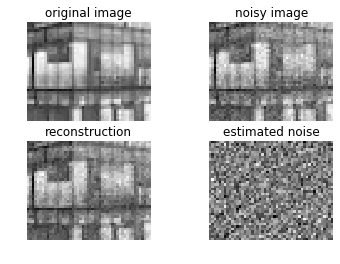

     error:  8.322809895905346


     when lambda:  0.015625


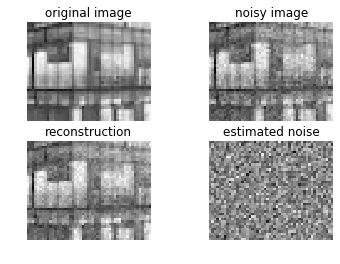

     error:  8.57540975187852


     when lambda:  0.03125


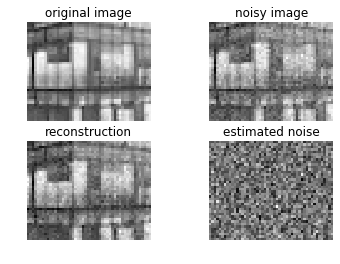

     error:  7.991933656023859


     when lambda:  0.0625


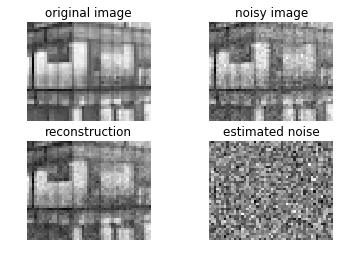

     error:  7.696682710550365


     when lambda:  0.125


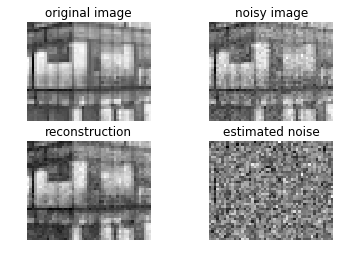

     error:  7.48611105652342


     when lambda:  0.25


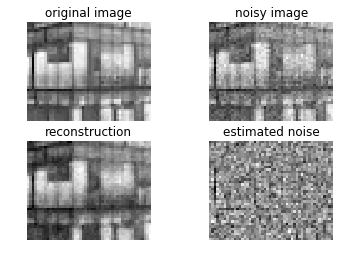

     error:  7.66109137030621


     when lambda:  0.5


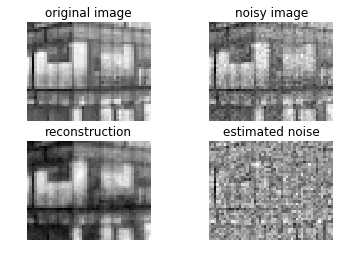

     error:  9.467617968732155


     when lambda:  1


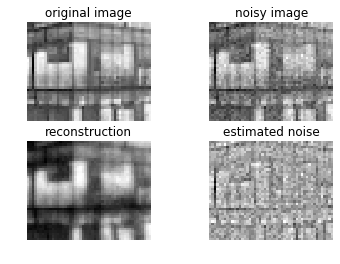

     error:  11.850859118997088


     when lambda:  2


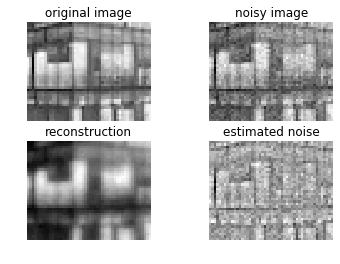

     error:  14.600034123986903


     when lambda:  4


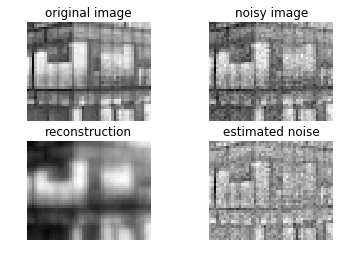

     error:  17.64965613602392


--------------------------------------
when noise std:  1.4
     when lambda:  0.0078125


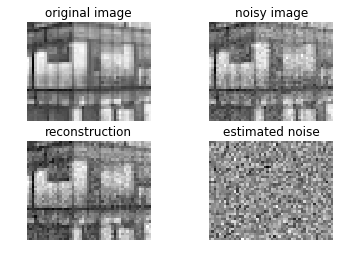

     error:  8.87068879376512


     when lambda:  0.015625


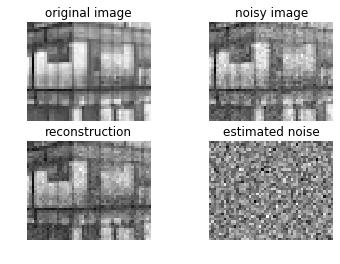

     error:  8.185272807070948


     when lambda:  0.03125


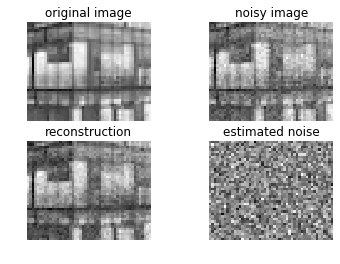

     error:  8.211964512332179


     when lambda:  0.0625


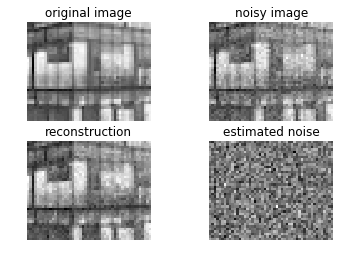

     error:  7.684272139578074


     when lambda:  0.125


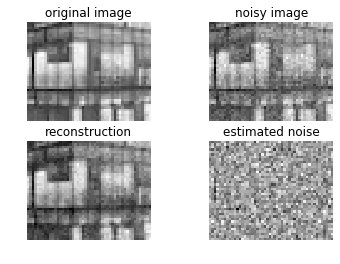

     error:  7.293894419656618


     when lambda:  0.25


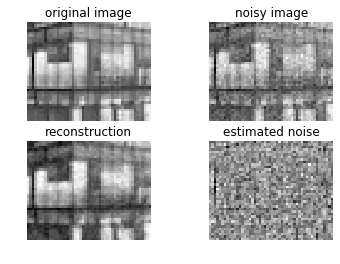

     error:  7.475266608751132


     when lambda:  0.5


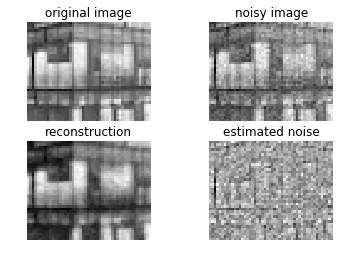

     error:  9.230863000519575


     when lambda:  1


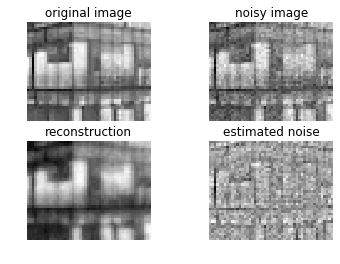

     error:  11.915048544088366


     when lambda:  2


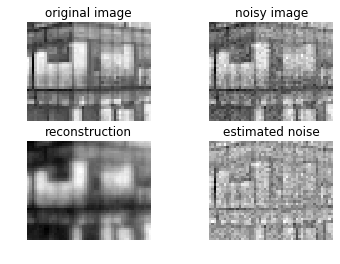

     error:  14.710931395756456


     when lambda:  4


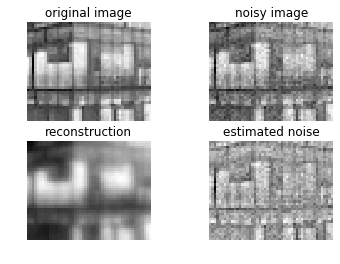

     error:  17.562533927744674


--------------------------------------


In [4]:
print('when noise std: ',0.2)
for i in range(-7,3):
    denoising_func(0.2,2**(i))
print('--------------------------------------')

print('when noise std: ',0.45)
for i in range(-7,3):
    denoising_func(0.2,2**(i))
print('--------------------------------------')

print('when noise std: ',0.7)
for i in range(-7,3):
    denoising_func(0.2,2**(i))
print('--------------------------------------')

print('when noise std: ',1)
for i in range(-7,3):
    denoising_func(0.2,2**(i))
print('--------------------------------------')

print('when noise std: ',1.4)
for i in range(-7,3):
    denoising_func(0.2,2**(i))
print('--------------------------------------')